Hallo. Hier ist der glorreiche Versuche einen Würfel auf eine Kugel zu plotten und vielleicht auch anderse herum. Wir freuen uns.

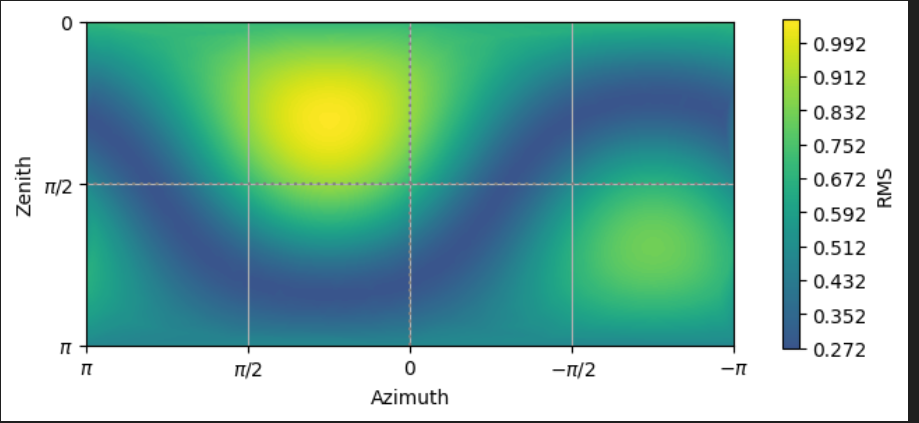

In [359]:
import numpy as np 
import matplotlib.pyplot as plt 
import pyfar as pf
import spaudiopy as spa


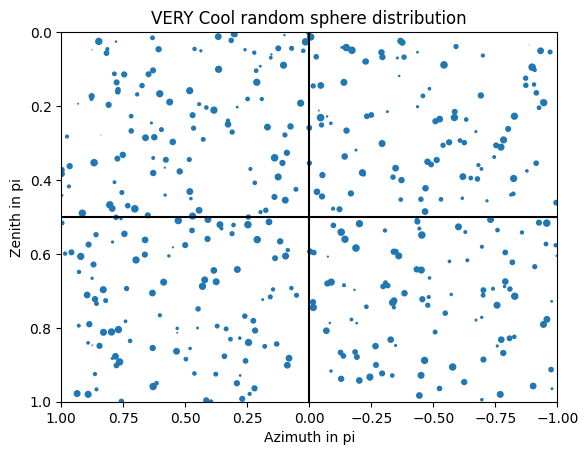

In [360]:
# choose seed --> very important !!!. Only works with theese numbers.
seed = [42, 69, 420][2]
np.random.seed(seed)

# generate random 3 dimensional array
test_array = np.random.random((seed,3))
#print(test_array)

# skale azimuth
test_array[:,0] -= 0.5
test_array[:,0] *= 2

# zenith is already perfect <3

# skale amplitude
test_array[:,2] *= 20




plt.scatter(test_array[:,0], test_array[:,1], s=test_array[:, 2])
plt.xlim(1, -1)
plt.ylim(1, 0)
plt.xlabel('Azimuth in pi')
plt.ylabel('Zenith in pi')
plt.title('VERY Cool random sphere distribution')
plt.axhline(0.5, c='black')
plt.axvline(0, c='black')

plt.show()

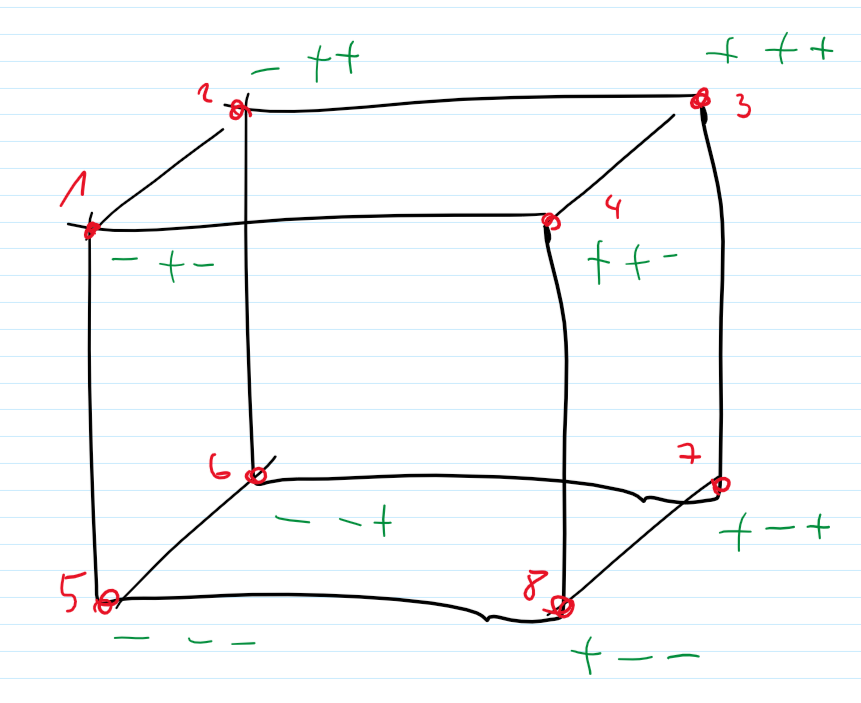

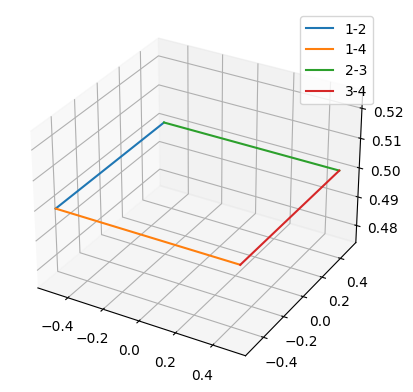

In [361]:
plt.figure()
plt.subplot(projection='3d')

plt.plot((-0.5, -0.5), (-0.5, 0.5), (0.5, 0.5), label='1-2')
plt.plot((-0.5, 0.5), (-0.5, -0.5), (0.5, 0.5), label='1-4')
plt.plot((-0.5, 0.5), (0.5, 0.5), (0.5, 0.5), label='2-3')
plt.plot((0.5, 0.5), (0.5, -0.5), (0.5, 0.5), label='3-4')

#plt.plot((0.5, 0.5), (0.5, 0.5),(0.5, 0.5), label='top')
#plt.plot((0.5, 0.5), (0.5, 0.5),(0.5, 0.5), label='top')
#plt.plot((0.5, 0.5), (0.5, 0.5),(0.5, 0.5), label='top')
#plt.plot((0.5, 0.5), (0.5, 0.5),(0.5, 0.5), label='top')
#plt.plot((0.5, 0.5), (0.5, 0.5),(0.5, 0.5), label='top')
#plt.plot((0.5, 0.5), (0.5, 0.5),(0.5, 0.5), label='top')

plt.legend()
plt.show()

# hardcoding is fine but we need the points as variables

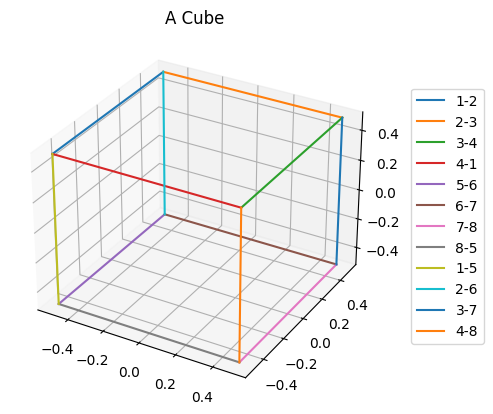

In [362]:
# assume cube with Kantenlänge = 1

points = np.array([
    (-1,1,-1),
    (-1,1,1),
    (1,1,1),
    (1,1,-1),
    (-1,-1,-1),
    (-1,-1,1),
    (1,-1,1),
    (1,-1,-1)
])
#points = np.add(points, 1)
points = np.multiply(points, 0.5)

edge_points = np.array([
    (1, 2),
    (2, 3),
    (3, 4),
    (4, 1),
    (5, 6),
    (6, 7),
    (7, 8),
    (8, 5),
    (1, 5),
    (2, 6),
    (3, 7),
    (4, 8)
])
# subtract 1 to count like a real computer
edge_points = np.add(edge_points, -1)


# loop magic
x_start = []
y_start = []
z_start = []

x_end = []
y_end = []
z_end = []

labels = []

for i in edge_points:
    point_number_start = i[0]
    point_number_end = i[1]

    x_i_start = points[point_number_start][0]
    x_i_end = points[point_number_end][0]

    y_i_start = points[point_number_start][1]
    y_i_end = points[point_number_end][1]

    z_i_start = points[point_number_start][2]
    z_i_end = points[point_number_end][2]

    x_start.append(x_i_start)
    y_start.append(y_i_start)
    z_start.append(z_i_start)

    x_end.append(x_i_end)
    y_end.append(y_i_end)
    z_end.append(z_i_end)

    label_i = str(point_number_start + 1) + "-" + str(point_number_end + 1)
    labels.append(label_i)

plt.figure()
plt.subplot(projection='3d')

for i, label in enumerate(labels):
    plt.plot((x_start[i], x_end[i]), 
             (z_start[i], z_end[i]),
             (y_start[i], y_end[i]),
             label=label)

plt.legend(loc='right', bbox_to_anchor=(1.3, 0.5))
#plt.tight_layout()
plt.title('A Cube')

plt.show()

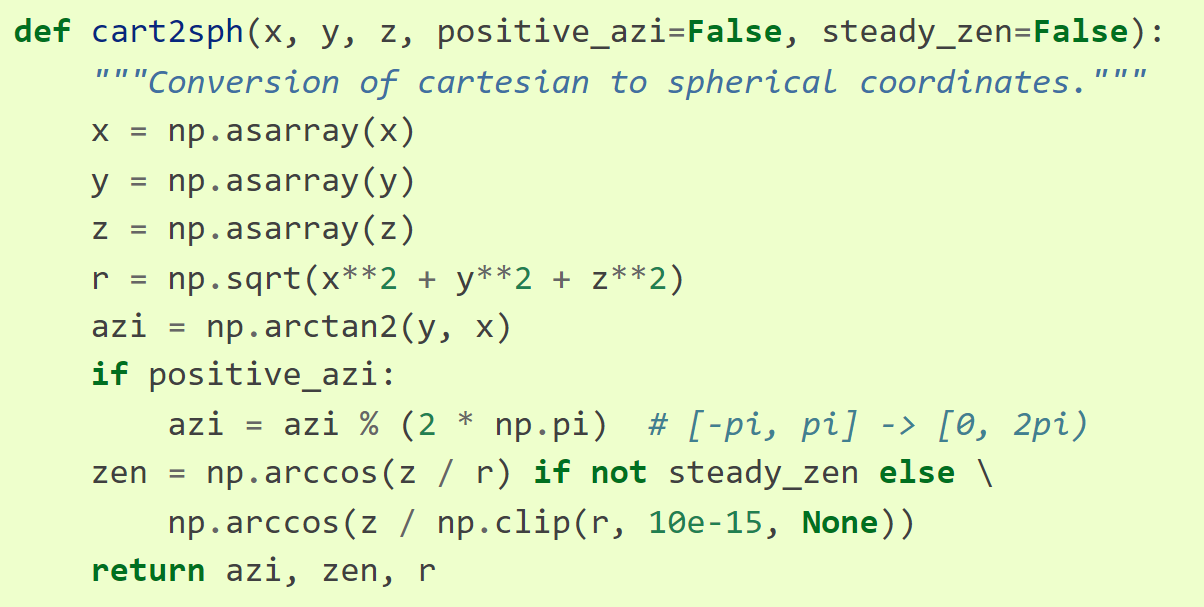

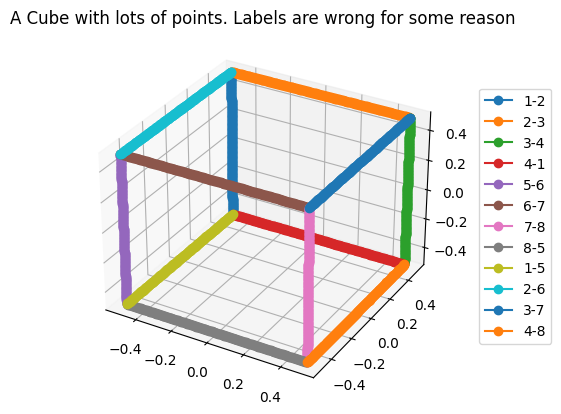

In [363]:
# now we want the cube in sperical representation

x_start_sph = []
y_start_sph = []
z_start_sph = []

x_end_sph = []
y_end_sph = []
z_end_sph = []

start_points_xyz = np.array([
    x_start,
    y_start,
    z_start
]).T

end_points_xyz = np.array([
    x_end,
    y_end,
    z_end
]).T


plt.figure()
plt.subplot(projection='3d')

points_per_line = 200
# make lines xyz array (number, dimension, sample)
lines_xyz = np.empty((12, 3, points_per_line))

for i, label in enumerate(labels):
    line_points = np.linspace(start_points_xyz[i], end_points_xyz[i], points_per_line).T
    lines_xyz[i, :, : ] = line_points
    plt.plot(lines_xyz[i][0], lines_xyz[i][1], lines_xyz[i][2], label=label, marker='o')


plt.legend(loc='right', bbox_to_anchor=(1.3, 0.5))
plt.title('A Cube with lots of points. Labels are wrong for some reason')
plt.show()

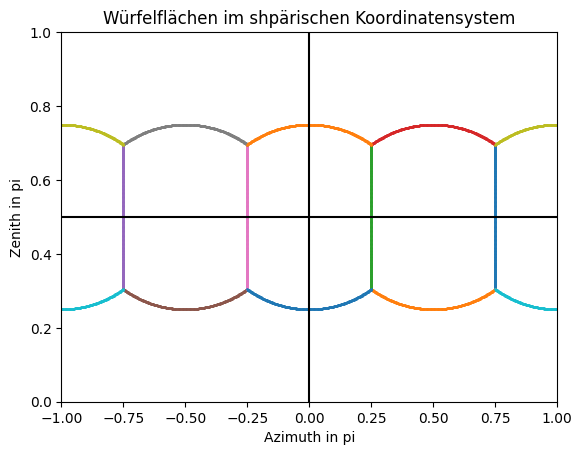

In [364]:

# make lines sph array (number, azi/zen/r, sample)
lines_sph = np.empty((12, 3, points_per_line))

for i, label in enumerate(labels):
    lines_sph[i, :, :] = spa.utils.cart2sph(lines_xyz[i][0], lines_xyz[i][1], lines_xyz[i][2], positive_azi=False)
    plt.scatter(lines_sph[i][0]/np.pi, lines_sph[i][1]/np.pi, s=1)

plt.xlim(-1,1)
plt.ylim(0,1)
plt.title('Würfelflächen im shpärischen Koordinatensystem')
plt.xlabel('Azimuth in pi')
plt.ylabel('Zenith in pi')
plt.axhline(0.5, c='black')
plt.axvline(0, c='black')

plt.show()


In [365]:
# this doesn't work :(
start_points_sph = spa.utils.cart2sph(start_points_xyz[0], start_points_xyz[1], start_points_xyz[2], positive_azi=False)
end_points_sph = spa.utils.cart2sph(end_points_xyz[0], end_points_xyz[1], end_points_xyz[2], positive_azi=False)

print(start_points_sph[0])

[-2.35619449  0.78539816  2.35619449]


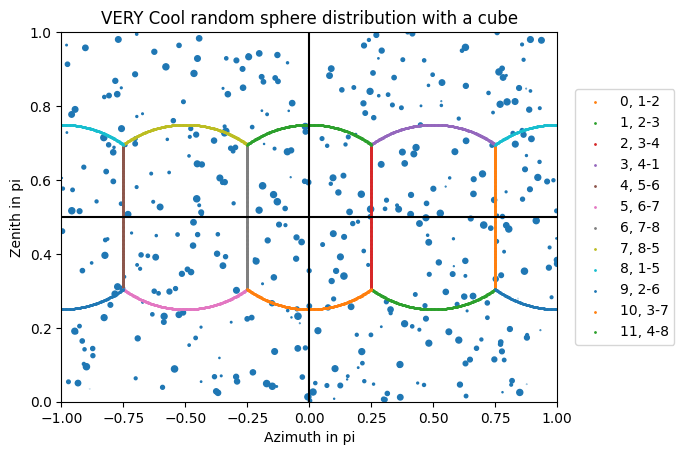

In [366]:
plt.scatter(test_array[:,0], test_array[:,1], s=test_array[:, 2])
plt.xlabel('Azimuth in pi')
plt.ylabel('Zenith in pi')
plt.title('VERY Cool random sphere distribution with a cube')
plt.axhline(0.5, c='black')
plt.axvline(0, c='black')

for i , label in enumerate(labels):
    plt.scatter(lines_sph[i][0]/np.pi, lines_sph[i][1]/np.pi, s=1, label=f"{i}, {label}")
    

plt.xlim(-1,1)
plt.ylim(0,1)

plt.legend(loc='right', bbox_to_anchor=(1.25, 0.5))
plt.show()

Good Job Flo!

Now we need this the other way round to classify incoming samples.


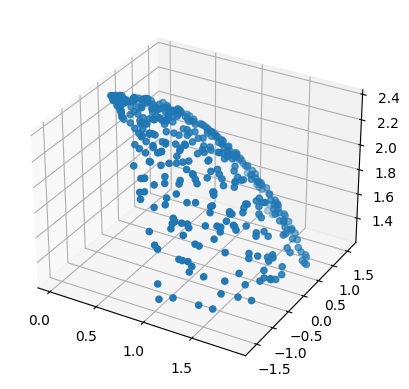

In [367]:
azi_pi = test_array[:,0]
zen_pi = test_array[:,1]
r = lines_sph[0,0,0]

x, y, z = spa.utils.sph2cart(azi_pi, zen_pi, r=r)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x, y, z)
plt.show()


plt.show()

Well that was unexpected. I wos hoping to see a sphere again :(((

But we can still try so use the findings from cube to sphere and build a classifiyer out of that.

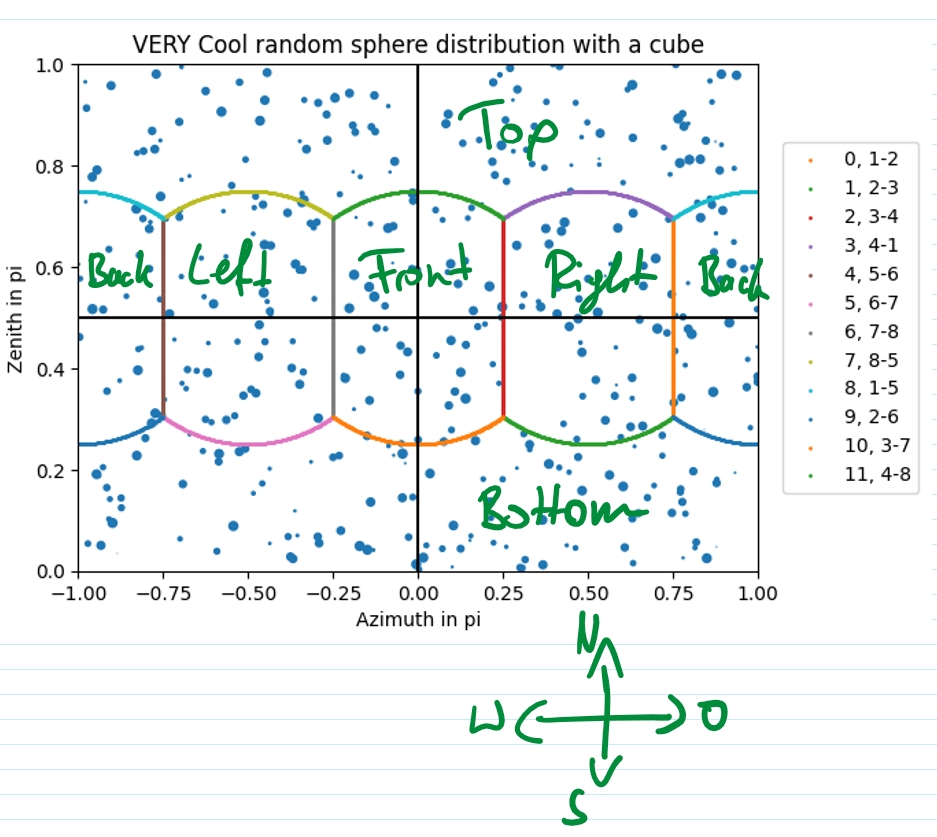

Concept for classifier:

- take azimuth and seperate by vertical lines
- decide of point is part of top, bottom or middel sector


What do we need:

- 4 vertical lines (easy = single azimuth value)
- find function for zenith top / bottom sector curve 
    - need only part from one vertical sector ( should be something like first half of a sine or something)
    - approximation could work aswell


In [368]:
#for i , label in enumerate(labels):
#    plt.scatter(lines_sph[i][0]/np.pi, lines_sph[i][1]/np.pi, s=1, label=f"{i}, {label}")

#i=0
#plt.scatter(lines_sph[i][0]/np.pi, lines_sph[i][1]/np.pi, s=1)
#plt.show()

vertical_rigth_back = lines_sph[0][0][0]/np.pi
print("vertical_rigth_back:", vertical_rigth_back)

vertical_front_right = lines_sph[2][0][0]/np.pi
print("vertical_front_right:", vertical_front_right)

vertical_back_left = lines_sph[4][0][0]/np.pi
print("vertical_back_left:", vertical_back_left)

vertical_left_front = lines_sph[6][0][0]/np.pi
print("vertical_left_front:", vertical_left_front)


vertical_rigth_back: 0.75
vertical_front_right: 0.25
vertical_back_left: -0.75
vertical_left_front: -0.25


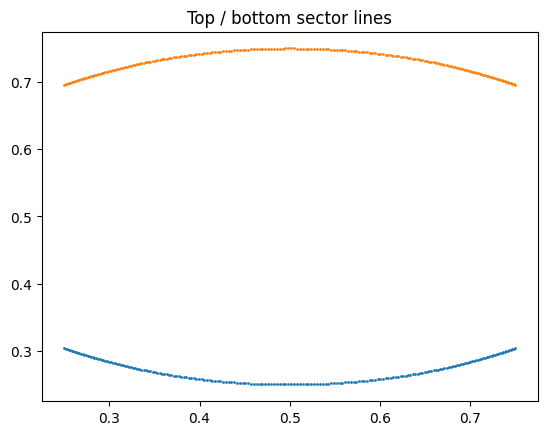

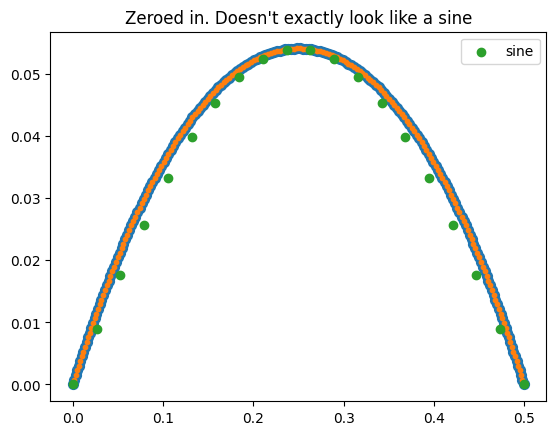

In [369]:
i=1
plt.figure()
plt.scatter(lines_sph[i][0]/np.pi, lines_sph[i][1]/np.pi, s=1)
plt.scatter(lines_sph[i+2][0]/np.pi, lines_sph[i+2][1]/np.pi, s=1)
plt.title('Top / bottom sector lines')
plt.show()


i=1
plt.figure()
plt.scatter(lines_sph[i][0]/np.pi-0.25, np.abs(lines_sph[i][1]/np.pi - 0.5)-np.abs(lines_sph[i][1][0]/np.pi - 0.5), s=50)
plt.scatter(lines_sph[i+2][0]/np.pi-0.25, np.abs(lines_sph[i+2][1]/np.pi - 0.5)-np.abs(lines_sph[i][1][0]/np.pi - 0.5), s=10)



# try if its a sine
samples = np.linspace(0, 0.5, 20)
y_sine = (0.25-np.abs(lines_sph[i][1][0]/np.pi - 0.5)) * np.sin(samples*(2*np.pi))

plt.scatter(samples, y_sine, label='sine')
plt.title("Zeroed in. Doesn't exactly look like a sine")
plt.legend()

plt.show()



Mhh why does this not match perfectly. Maybe 0 and 0.5 isn't the real half sine point?

Lets check it out ;)

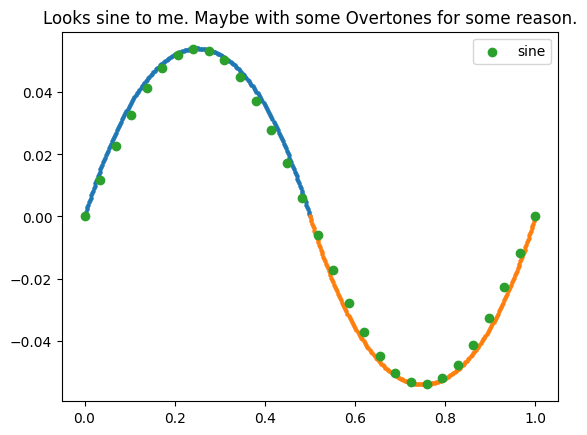

In [370]:
i=1
plt.figure()
plt.scatter(lines_sph[i][0]/np.pi-0.25, np.abs(lines_sph[i][1]/np.pi - 0.5)-np.abs(lines_sph[i][1][0]/np.pi - 0.5), s=5)
plt.scatter(lines_sph[i+2][0]/np.pi+0.25, -(np.abs(lines_sph[i+2][1]/np.pi - 0.5)-np.abs(lines_sph[i][1][0]/np.pi - 0.5)), s=5)


# try if its a sine
samples = np.linspace(0, 1, 30)
y_sine = -(0.25-np.abs(lines_sph[i][1][0]/np.pi)) * np.sin(samples*(2*np.pi))

plt.scatter(samples, y_sine, label='sine')
plt.title('Looks sine to me. Maybe with some Overtones for some reason.')
plt.legend()
plt.show()



Let's ignore the slightly distorted sine and build this classifier!

We have to make some assumptions:
- failure between original curve and simple sine is very small. (See Graph)
- A point that's excatly on the sine is is always on a middle sector. That's because the pure sine tends to be a bit smaller than the real curve.
- A point that's exactly on a vertical line is always left or right. For calculation of T/S and T/H it makes life easier. So we assume the contribution of this edge case is very small. Of course if you test the classifier just on those angles, results will be questionable.

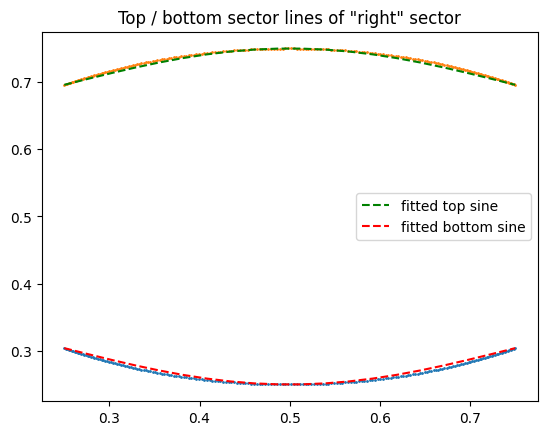

y_0_top; 0.3040867239846963
y_0_bottom: 0.6959132760153038
amplitude: 0.05408672398469633


In [371]:
# First we have to find a fitting sine function to compare to.



# original:
i=1
plt.figure()
plt.scatter(lines_sph[i][0]/np.pi, lines_sph[i][1]/np.pi, s=1)
plt.scatter(lines_sph[i+2][0]/np.pi, lines_sph[i+2][1]/np.pi, s=1)
plt.title('Top / bottom sector lines of "right" sector')


# now lets find a function
x_offset = 0.25
y_0_top = 0.6959132760153038
y_0_bottom = 0.3040867239846963
amplitude = 0.05408672398469633


x = np.linspace(0, 0.5, 20) + x_offset
y_top = amplitude * np.sin((x-x_offset) * 2 * np.pi) + y_0_top
y_bottom = -amplitude * np.sin((x-x_offset) * 2 * np.pi) + y_0_bottom

plt.plot(x, y_top, label="fitted top sine", c='green', linestyle="--")
plt.plot(x, y_bottom, label="fitted bottom sine", c='red', linestyle="--")


plt.legend()
plt.show()

print("y_0_top;", lines_sph[i][1][0]/np.pi)
print("y_0_bottom:", lines_sph[i+2][1][0]/np.pi)
print("amplitude:" , -(0.25-np.abs(lines_sph[i][1][0]/np.pi)))


In [372]:
y_sine = (0.25-np.abs(lines_sph[i][1][0]/np.pi - 0.5)) * np.sin(samples*(2*np.pi))
x_0 = 0.25
y_0 = lines_sph[i][1][0]/np.pi
invert_phase = -1

y_sine = invert_phase * (x_0 - np.abs(y_0)) * np.sin(samples*(2*np.pi))

vertical_rigth_back = lines_sph[0][0][0]/np.pi
print("vertical_rigth_back:", vertical_rigth_back)

vertical_front_right = lines_sph[2][0][0]/np.pi
print("vertical_front_right:", vertical_front_right)

vertical_back_left = lines_sph[4][0][0]/np.pi
print("vertical_back_left:", vertical_back_left)

vertical_left_front = lines_sph[6][0][0]/np.pi
print("vertical_left_front:", vertical_left_front)


vertical_rigth_back: 0.75
vertical_front_right: 0.25
vertical_back_left: -0.75
vertical_left_front: -0.25


In [382]:
def y_top(x, x_offset): 
    y_0_top = 0.6959132760153038  
    amplitude = 0.05408672398469633
    y_top = amplitude * np.sin((x-x_offset) * 2 * np.pi) + y_0_top

    return y_top



def y_bottom(x, x_offset):
    y_0_bottom = 0.3040867239846963
    amplitude = 0.05408672398469633
    y_bottom = -amplitude * np.sin((x-x_offset) * 2 * np.pi) + y_0_bottom

    return y_bottom



def sector_classfier(azi, zen):
    vertical_rigth_back = 0.75
    vertical_front_right = 0.25
    vertical_back_left = -0.75
    vertical_left_front = -0.25

    label = -1

    # back west
    if azi < vertical_back_left and azi >= -1:
        #check for top / bottom
        x_offset = -1.25

        # check top
        if zen > y_top(azi, x_offset):
            label = 0

        # check bottom
        elif zen < y_bottom(azi, x_offset):
            label = 5

        else:
            label = 4
            
    # left
    elif azi >= vertical_back_left and azi <= vertical_left_front:
        #check for top / bottom
        x_offset = -0.75

        # check top
        if zen > y_top(azi, x_offset):
            label = 0

        # check bottom
        elif zen < y_bottom(azi, x_offset):
            label = 5

        else:
            label = 2

    # front
    elif azi > vertical_left_front and azi < vertical_front_right:
        #check for top / bottom
        x_offset = -0.25

        # check top
        if zen > y_top(azi, x_offset):
            label = 0

        # check bottom
        elif zen < y_bottom(azi, x_offset):
            label = 5

        else:
            label = 1

    # right
    elif azi >= vertical_front_right and azi <= vertical_rigth_back:
        #check for top / bottom
        x_offset = 0.25

        # check top
        if zen > y_top(azi, x_offset):
            label = 0

        # check bottom
        elif zen < y_bottom(azi, x_offset):
            label = 5

        else:
            label = 3

    # back east
    elif azi > vertical_rigth_back and azi <= 1:
        #check for top / bottom
        x_offset = 0.75

        # check top
        if zen > y_top(azi, x_offset):
            label = 0

        # check bottom
        elif zen < y_bottom(azi, x_offset):
            label = 5

        else:
            label = 4


    return int(label)




def label2sectorname(label):    
    # give sectors a label
    match label:
        case 0:
            sector_name = "top"
        case 1:
            sector_name = "front"
        case 2:
            sector_name = "left"
        case 3:
            sector_name = "right"
        case 4:
            sector_name = "back"
        case 5:
            sector_name = "bottom"
        case _:
            sector_name = (f"could not determine sector name from label {label}")
    
    return sector_name



def add_sector2arrays(azimuth: np.ndarray, zenith: np.ndarray, radius: np.ndarray):
    
    data = np.empty((azimuth.shape[0], 4))
    for i, (azi_i, zen_i, r_i) in enumerate(zip(azimuth, zenith, radius)):
        label_i = sector_classfier(azi_i, zen_i)
        sample_data = np.array([azi_i, zen_i, r_i, label_i])
        data[i,:] = sample_data
        
    return data



def energy_per_sector(data: np.ndarray, start_milliseconds=15, stop_milliseconds=100, samplerate=44100):
    # data dimensions: azimuth, zeith, radius, label

    start_sample = int(start_milliseconds / 1000 * samplerate)
    stop_sample = int(stop_milliseconds /1000 * samplerate)

    data = data[start_sample:stop_sample, :]


    # get indices of label
    top_idx = np.where(data[:,3] == 0)[0]
    front_idx = np.where(data[:,3] == 1)[0]
    left_idx = np.where(data[:,3] == 2)[0]
    right_idx = np.where(data[:,3] == 3)[0]
    back_idx = np.where(data[:,3] == 4)[0]
    bottom_idx = np.where(data[:,3] == 5)[0]

    # sum energys per label
    top_energy = np.sum(data[[top_idx], 2])
    front_energy = np.sum(data[[front_idx], 2])
    left_energy = np.sum(data[[left_idx], 2])
    right_energy = np.sum(data[[right_idx], 2])
    back_energy = np.sum(data[[back_idx], 2])
    bottom_energy = np.sum(data[[bottom_idx], 2])

    energy = np.array([top_energy, front_energy, left_energy, right_energy, back_energy, bottom_energy])
    
    return energy




def calc_TS_TH(energy):
    TS = 20 * np.log10(energy[0] / (energy[2] + energy[3]))
    TH = 20 * np.log10(energy[0] / (energy[2] + energy[3] + energy[4]))

    return TS, TH


def TH_TS_wrapper(azimuth: np.ndarray, zenith: np.ndarray, radius: np.ndarray, start_milliseconds=15, stop_milliseconds=100, samplerate=44100):
    data = add_sector2arrays(azimuth, zenith, radius)
    energy = energy_per_sector(data, start_milliseconds=start_milliseconds, stop_milliseconds=stop_milliseconds, samplerate=samplerate)
    TH, TS = calc_TS_TH(energy)

    print("Top Horizontal:", TH)
    print("Top / Side:", TS)

    return TH, TS


In [383]:
size = 1000

azi = np.random.uniform(-1, 1, size)
zen = np.random.uniform(0, 1, size)
radius = np.random.uniform(0, 10, size)

data = add_sector2arrays(azi, zen, radius)
print(data.shape)

energy = energy_per_sector(data)

print(energy)

TH, TS = calc_TS_TH(energy)

print(TH)
print(TS)

_, _ = TH_TS_wrapper(azi, zen, radius)


(1000, 4)
[527.31973107 197.97876292 155.84939548 169.39839985 163.70466597
 472.40589855]
4.1971932103849845
0.6561477058883697
Top Horizontal: 4.1971932103849845
Top / Side: 0.6561477058883697


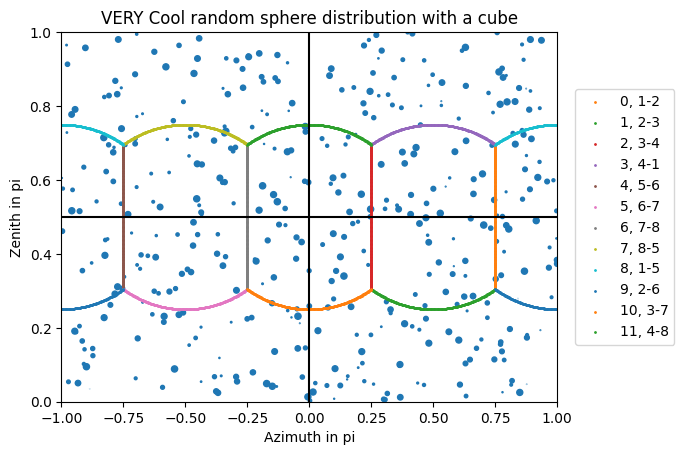

In [375]:
# azi / zen

azi = np.linspace(-1, 1, 10000)

for idx in azi:
    print(label2sectorname(sector_classfier(idx, 0.74)))

back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
back
